## Distance and Similarity
For cardinal data the distance is often measured with a $L_q$ type metric (Minkowski) of the form 

$$d(i,j)=(\sum_{k=1}^p |{x_{ik}-x_{jk}|^q})^\frac{1}{q}$$

Especially, $q = 1$: Manhattan and $q = 2$: Euclidean.

<br>
<br>
<br>

For ordinal data the Minkowski metric is applicable after normalizing ranks $r\in 1,\dots,R$ by

$$ x_k= \frac{r-1}{R-1} $$

However, one-hot encoding and measuring similarity is a possible solution to nominal (as well as ordinal) data. Commonly similarity measures are of the form

$$ s(i,j)= \frac{\delta n_{00}+n_{11}}{\delta n_{00}+n_{11}+\lambda(n_{01}+n_{10})}~~\text{with distance}~~ d(i,j)=\sqrt{s(i,i)+s(j,j)-2s(i,j)} $$

here

$n_{11}$ : number of dims in which both values of $i$ and $j$ are True, <br>
$n_{10}$ : number of dims in which the value of $i$ is True and for $j$ False, <br>
$n_{01}$ : number of dims in which the value of $j$ is True and for $i$ False, <br>
$n_{00}$ : number of dims in which both values of $i$ and $j$ are False. <br>

If the combinations 00 and 11 are equal important: Simple Matching with $\delta=1$ and $\lambda=1$.
If 00 and 11 are not equal important: Jaccard Similarity with $\delta=0$ and $\lambda=1$.
For more categroy encoding: Dice Similarity with $\delta=0$ and $\lambda=0.5$.

<br>
<br>
<br>

Gower similarity coefficient and Gower’s Distance as solution for mixed data type. 
Choose similarity measure between 0 and 1 for each variable individually and aggregate over all variables

$$ s(i,j)= \frac{\sum_{k=1}^p s_k(i,j) w_{ijk}}{\sum_{k=1}^p w_{ijk}} $$

with $s_k(i,j) \in [0,1]$ and weights $w_{ijk}$ usually used for identifiing valid comparisons. 
For cardinal variables the normalized Manhattan distance $s_k(i,j)=1-\frac{|x_{ik}-x_{jk}|}{R_k}$ is used where $R_k$ is the max value of k (outliers!),
for ordinal data the Manhattan distance of normalized ranks and for nominal data a suiting similarity measure.

Transform $ d(i,j)= \sqrt{1-s(i,j)} $ with ordinal variables present only metric otherwise behaves as Euclidean distance.


## Synthetic Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_samples, silhouette_score

from sklearn.datasets import make_blobs
np.random.seed(123)

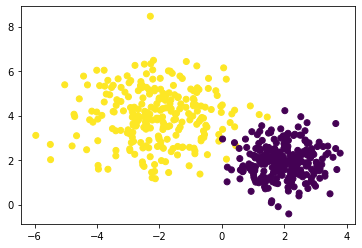

In [2]:
n = 500 # no. samples
centers = [(2, 2), (-2, 4)]  # centers of the two Gaussian
std = [0.75, 1.25]  # standard deviaton

# Call the function and obtain your data
X, y = make_blobs(n_samples=n, centers=centers, cluster_std=std)
plt.scatter(X[:,0],X[:,1], c=y);

## Number of Clusters

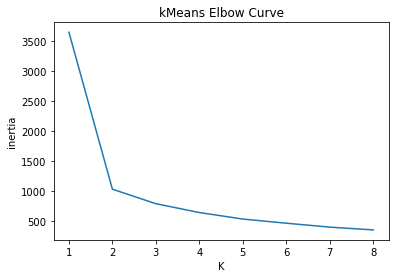

In [3]:
list_total_dist_sklearn = list()
for i in range(1,9):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, random_state=123) # go from 1 to 8 in the value of centroids
  res = km.fit_predict(X)
  list_total_dist_sklearn.append(km.inertia_) # check how inertia (~total distance) changes as we increase K
list_total_dist_sklearn
plt.plot(range(1,9), list_total_dist_sklearn) # from this graph, we can see the sharpest bend at 2 again
plt.title("kMeans Elbow Curve")
plt.ylabel("inertia")
plt.xlabel("K")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6162488307236345
For n_clusters = 3 The average silhouette_score is : 0.5048647796696554
For n_clusters = 4 The average silhouette_score is : 0.48111427928172296
For n_clusters = 5 The average silhouette_score is : 0.319721100398316
For n_clusters = 6 The average silhouette_score is : 0.32117427441582413


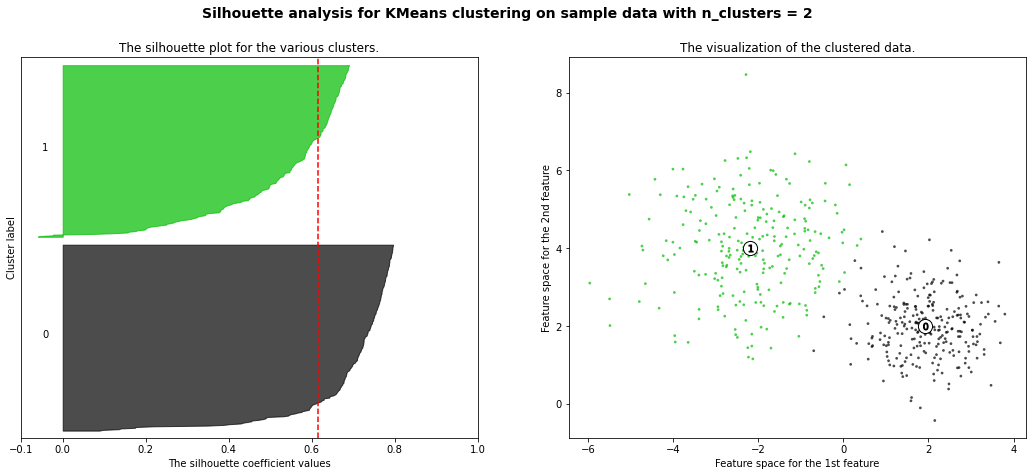

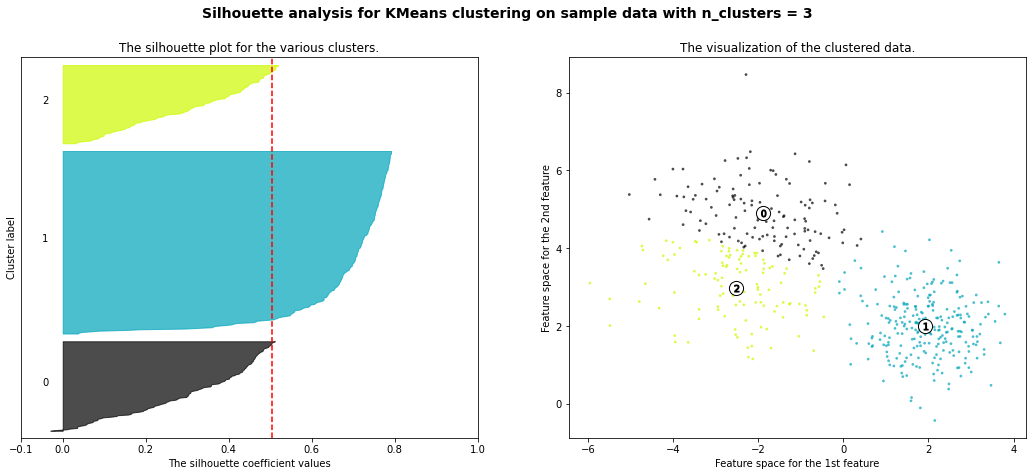

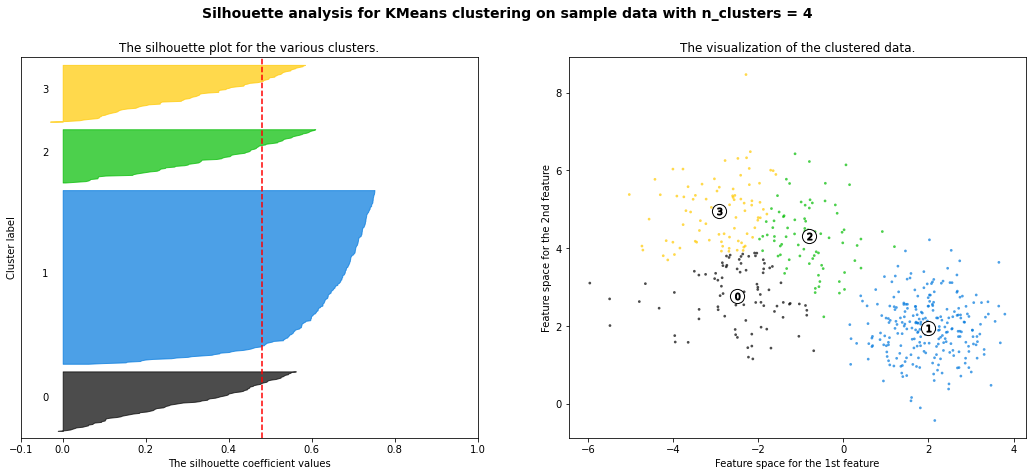

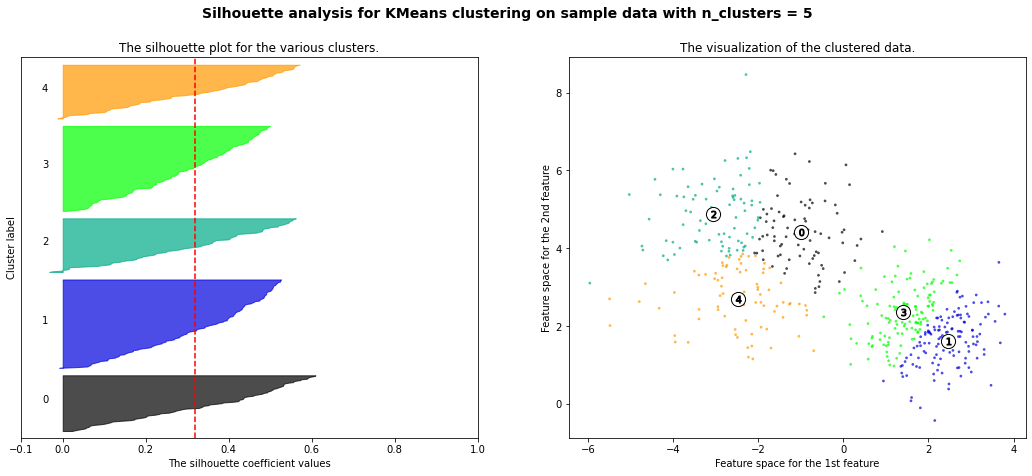

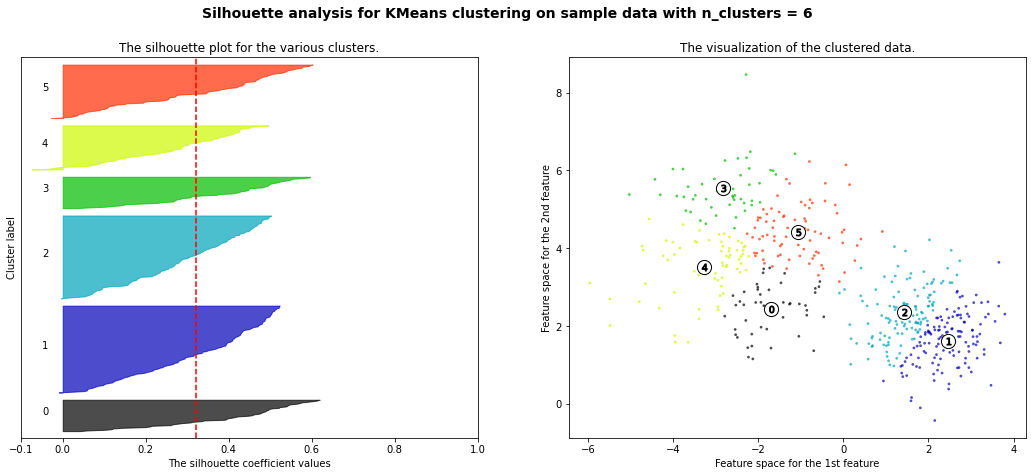

In [4]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

## k-Means
Its a partitioning cluster algorithm divides a set of N observations X into k disjoint clusters C, each described by $\bar{x}_{k}$ the mean of the observations in the cluster k it minimises the inertia or within-cluster sum-of-squares criterion. With $N_k$ as the number of observations in cluster k this is

$$C^*=\min_C\sum_{k=1}^K N_k \sum_{C(i)=k}|{x_{i}-\bar{x}_{k}|^2}$$

This is done by:
1. K random centroids are created in the feature space and all data points are assigned to the nearest centroid (using some measure of distance). This assignment of data point provides an initial cluster solution. 
2. Update the centroids by finding the empirical mean of the features across all data points are attachted to that cluster. 
3. Reassignment of data points to the nearest (updated) centroid. 
4. Repeat 2. process of updating centroids given a cluster solution and 3. updating cluster solutions given centroids until some stopping criterion is met i.e. solution does not change.

Note that solutions may differ based on the initial random selection of centroids hence invoke the algorithm multiple times with different random starting points. Then average over all runs or select the best in terms of smallest intra-cluster variances.

In [5]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [6]:
def label_cluster(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    labels = np.empty(n_samples) # creates empty array as long as samples for future labels

    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx # assign labels to each sample
    return labels

In [7]:
def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)] # creates a list of K number of lists
    for idx, sample in enumerate(X):
        centroid_idx = find_closest_centroid(sample, centroids) # find closest centroid for each sample
        clusters[centroid_idx].append(idx) # create index list of closest centroids
    return clusters

In [8]:
def find_closest_centroid(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [euclidean_distance(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

In [9]:
def update_centroids(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster,:], axis=0) # find new centroid by finding mean of all points assigned to centroid
        centroids[cluster_idx] = cluster_mean # collect all centroids
    return centroids

In [10]:
def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(K)] # check distance between old and new centroids
    return sum(distances) == 0 # return Boolean indicating whether centroids are the same as before or not

In [11]:
def KMeans(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape
    
    # Initialization 
    random_sample_idx = np.random.choice(n_samples, K, replace=False) # take random sample points to be initial clusters
    centroids = [X[idx] for idx in random_sample_idx] # label these points as centroids

    iteration_num = 0 # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):
        
        iteration_num += 1 # track iterations required

        clusters = create_clusters(K, X, centroids) # assignment to closest centroids (cluster creation)

        centroids_old = centroids # archive previous centroids
        centroids = update_centroids(X, K, n_features, clusters) # Updating centroids 
        
        # Convergence Confirmation
        if is_converged(centroids_old, centroids, K): # check if last iteration's centroids were the same as current iteration
            labels = label_cluster(n_samples, clusters)
            dist = [euclidean_distance(X[row_num], centroids[int(labels[row_num])]) for row_num in range(X.shape[0])] # get distance from each point to its centroid
            total_dist = np.sum(np.square(dist)) # total distance calculated as sum of squares
            break # exit loop since there was no change since last iteration

    # Classify samples as the index of their clusters
    return labels, iteration_num, K, centroids, total_dist

In [12]:
result = KMeans(X, K=2, max_iters=100)
print("No. Iterations:", result[1], ", No. Centres:", result[2], ", Total Squared Distance {:.10}".format(result[4]))
print()
print("Centroid Coordinates:", result[3]) # these display average value for each feature of the cluster

No. Iterations: 5 , No. Centres: 2 , Total Squared Distance 1027.692214

Centroid Coordinates: [[ 1.9242919   1.99818362]
 [-2.18532077  4.02016321]]


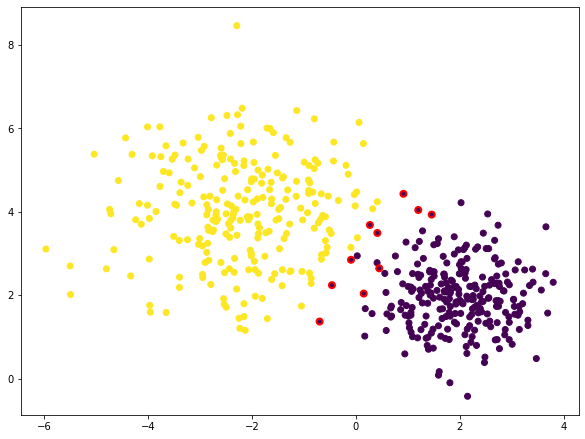

In [13]:
idx = result[0]==y  # index of the correctly clustered data points
plt.figure(figsize=(10,7.5))
plt.scatter(X[idx,0],X[idx,1], c=y[idx]);  # plot these points
plt.scatter(X[~idx,0],X[~idx,1], c=y[~idx], edgecolor='red', linewidths=2);  # highlight wrongly clustered data points  

### k-Means from Sklearn

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random', n_init=20, max_iter=100, random_state=888) # create KMeans object with certain settings
res = km.fit_predict(X) # fit to X and also predict labels of X
print("No. Iterations:", km.n_iter_,", Total Squared Distance {:.10}".format(km.inertia_))
km.cluster_centers_

No. Iterations: 5 , Total Squared Distance 1027.692214


array([[ 1.9242919 ,  1.99818362],
       [-2.18532077,  4.02016321]])

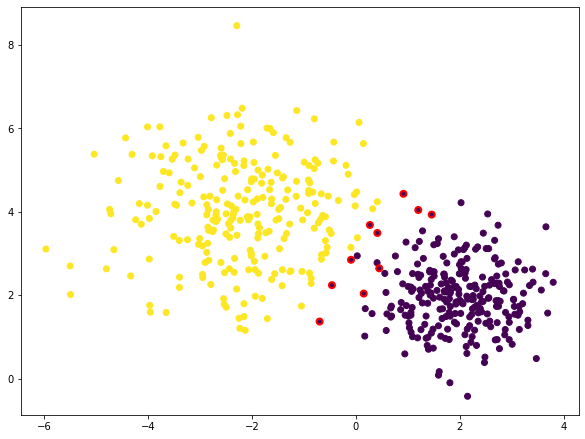

In [15]:
idx = km.labels_ == y  # index of the correctly clustered data points
wrong_km = len(km.labels_[km.labels_!=y])
plt.figure(figsize=(10,7.5))
plt.scatter(X[idx,0],X[idx,1], c=y[idx]);  # plot these points
plt.scatter(X[~idx,0],X[~idx,1], c=y[~idx], edgecolor='red', linewidths=2);  # highlight wrongly clustered data points  

## Agglomeration
A hierarchical cluster algorithm that is builded upon the distance matrix $D^{(0)}$ with distance metric $d$ for n clusters i.e. a $n \times n$-matrix . The two nearest clusters are merged and the distance matrix $D^{(k)}$ - a $(n - k) \times (n - k)$-matrix - is updated with

$$d(i \cup j , k) = \alpha_i d(i,k) + \alpha_j d(j,k) + \beta d(i,j) + \gamma|d(i,k) - d(j,k)|$$

Repeat updating until only one cluster is left.

The result depends on the definition of the linkage between clusters via $\alpha_i$,$\alpha_j$, $\beta$ and $\gamma$
1. 'ward' minimizes the variance of the clusters being merged ($\alpha_i=\frac{n_i+n_k}{n_i+n_j+n_k}$,$\alpha_j=\frac{n_j+n_k}{n_i+n_j+n_k}$, $\beta=\frac{n_k}{n_i+n_j+n_k}$ and $\gamma=0$). Error-sum-of-squares method for euclidean distance, that tends toward equal-sized clusters.
2. 'average' uses the average of the distances of each observation of the two sets ($\alpha_i=\frac{n_i}{n_i+n_j}$,$\alpha_j=\frac{n_j}{n_i+n_j}$, $\beta=0$ and $\gamma=0$). Unweighted pair-group method using arithmetic averages.
3. 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets($\alpha_i=\frac{1}{2}$,$\alpha_j=\frac{1}{2}$, $\beta=0$ and $\gamma=\frac{1}{2}$). Furthest-neighbor method, that tends to produce compact clusters.
4. 'single' uses the minimum of the distances between all observations of the two sets ($\alpha_i=\frac{1}{2}$,$\alpha_j=\frac{1}{2}$, $\beta=0$ and $\gamma=-\frac{1}{2}$). Nearest-neighbor method, that tends to produce chains of clusters.

Note that solutions may differ based on the initial random selection of centroids hence invoke the algorithm multiple times with different random starting points. Then average over all runs or select the best in terms of smallest intra-cluster variances.

In [16]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete') # create AgglomerativeClustering object
res = ac.fit_predict(X) # fit to X and also predict labels of X

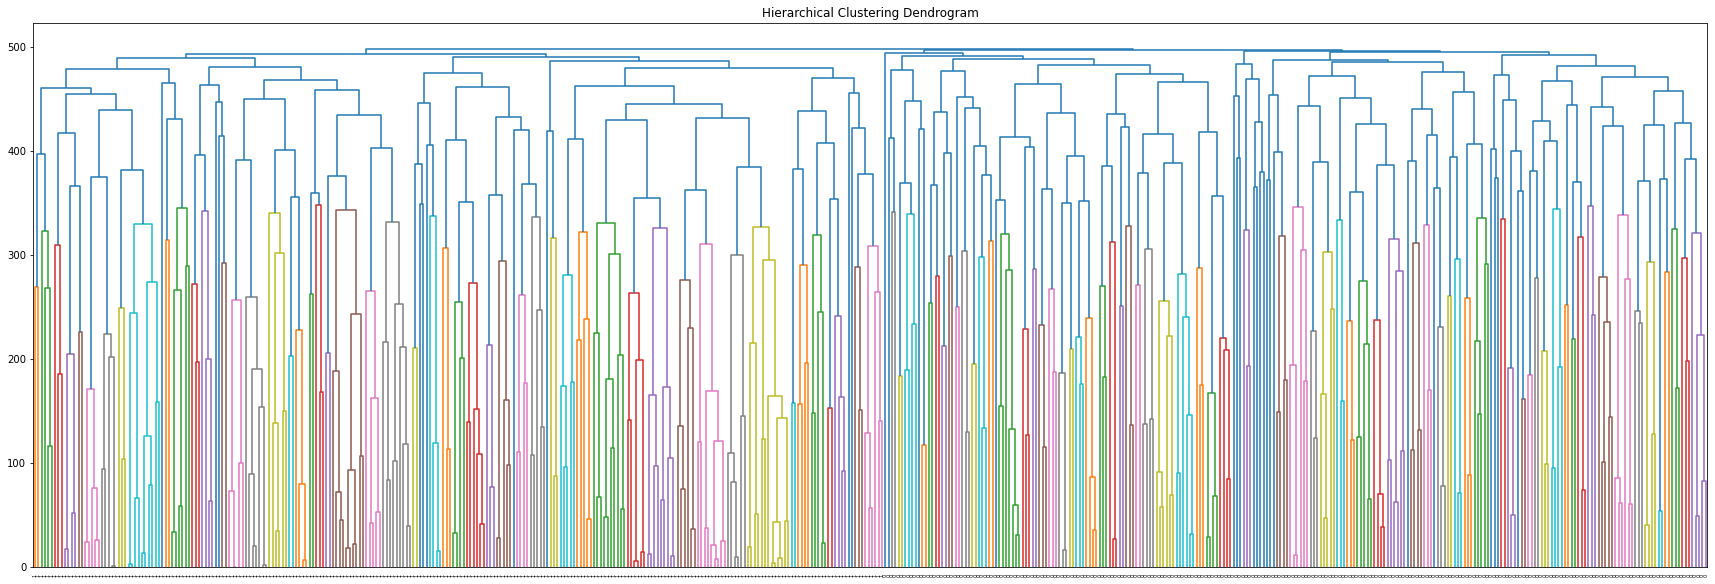

In [17]:
def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_
    # Distances between each pair of children
    distance = np.arange(children.shape[0])
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(ac, labels=ac.labels_)
plt.show()

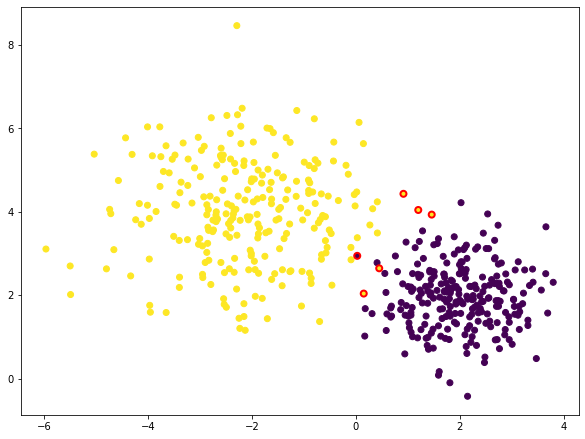

In [18]:
idx = ac.labels_ == y  # index of the correctly clustered data points
wrong_ac = len(ac.labels_[ac.labels_==y])
plt.figure(figsize=(10,7.5))
plt.scatter(X[~idx,0],X[~idx,1], c=y[~idx]);  # plot these points
plt.scatter(X[idx,0],X[idx,1], c=y[idx], edgecolor='red', linewidths=2);  # highlight wrongly clustered data points 

## Density-Based Spacial Clustering of Accplication with Noise (DBSCAN)
A core distance $\epsilon$ and a minimal neighbour number $n_{min}$ is defined such that all $d(i,j) \leq \epsilon$ belong to same cluster iff 

$$\sum_j I(d(i,j) < \epsilon) > n_{min} $$

All observation that do not belong to a cluster are noise observations.

In [19]:
db = DBSCAN(min_samples=10, eps=0.65, metric='euclidean') # create DBSCAN object
res = db.fit_predict(X) # fit to X and also predict labels of X
db_labels = db.labels_
db_labels[db_labels==0] = 2
db_labels[db_labels==1] = 0
db_labels[db_labels==2] = 1

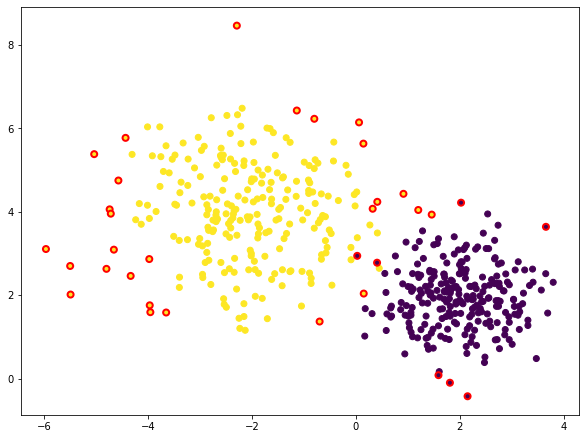

In [20]:
idx = db.labels_ == y  # index of the correctly clustered data points
wrong_db = len(db.labels_[db.labels_!=y])
plt.figure(figsize=(10,7.5))
plt.scatter(X[idx,0],X[idx,1], c=y[idx]);  # plot these points
plt.scatter(X[~idx,0],X[~idx,1], c=y[~idx], edgecolor='red', linewidths=2);  # highlight wrongly clustered data points 

## Gaussian Mixture Models (GMM) by Expectation Maximization (EM)

K clusters and each follows a p dimentional multivariate normal distribution with $\mu_j$ and $\Sigma_j$ such that the mixture of K gaussians $f(x)=\sum_k \beta_k f(x,\mu_k,\Sigma_k)$ with $\sum_k \beta_k = 1$. Initialize with $\hat{\beta}_j^{(0)}$, $\hat{\mu}_j^{(0)}$ and $\hat{\Sigma}_j^{(0)}$ randomly or by k-means.

E-Step (probability that $x_i$ belongs to $C_j$):
$$P^{(t+1)}(C_j|x_i) = \frac{\hat{\beta}_j^{(t)} f(x_i,\hat{\mu}_j^{(t)},\hat{\Sigma}_j^{(t)})}{\sum_k \hat{\beta}_k^{(t)} f(x_i,\hat{\mu}_k^{(t)},\hat{\Sigma}_k^{(t)})} ~~~\text{with}~~~ P(C_j|x) = \frac{P(x|C_j)P(C_j)}{\sum_k P(x|C_k)P(C_k)} = \frac{P(x|C_j)P(C_j)}{P(x)}$$

M-Step (recompute estimates for $\mu_j$ and $\Sigma_j$):

$$\hat{\mu}_j^{(t+1)} = \frac{\sum_{i=1}^n x_i P^{(t+1)}(C_j|x_i)}{\sum_{i=1}^n P^{(t+1)}(C_j|x_i)}~,~~~\hat{\Sigma}_j^{(t+1)} = \frac{\sum_{i=1}^n P^{(t+1)}(C_j|x_i)(x_i-\hat{\mu}_j^{(t+1)})^T(x_i-\hat{\mu}_j^{(t+1)})}{\sum_{i=1}^n P^{(t+1)}(C_j|x_i)}~,~~~ \hat{\beta}_j^{(t+1)}=\frac{1}{n}\sum_{i=1}^n P^{(t+1)}(C_j|x_i)$$

Stop if maxit is reached or $|\hat{\mu}_j^{(t+1)}-\hat{\mu}_j^{(t)}|<\epsilon$.

In [21]:
em = GaussianMixture(n_components=2, covariance_type='full') # create GMM object
res_gm = em.fit_predict(X) # fit to X and also predict labels of X

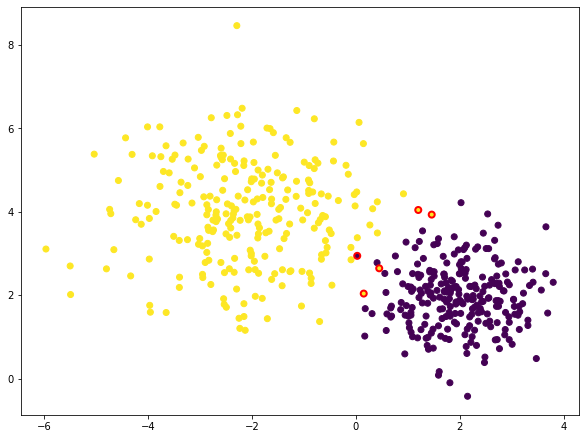

In [22]:
idx = res_gm == y  # index of the correctly clustered data points
wrong_gm = len(res_gm[res_gm!=y])
plt.figure(figsize=(10,7.5))
plt.scatter(X[idx,0],X[idx,1], c=y[idx]);  # plot these points
plt.scatter(X[~idx,0],X[~idx,1], c=y[~idx], edgecolor='red', linewidths=2);  # highlight wrongly clustered data points 

## Evaluation of Clustering Result - Internal Criteria

In [42]:
print("Number of Misclassified Instances:")
print(wrong_km, "for k-Means")
print(wrong_ac, "for Agglomeration")
print(wrong_db, "for DBSCAN")
print(wrong_gm, "for GMM")

Number of Misclassified Instances:
10 for k-Means
6 for Agglomeration
34 for DBSCAN
5 for GMM


### Calinski-Harabasz Index
$$ CH = \frac{n_E-k}{k-1} \times \frac{\text{tr}(B_k)}{\text{tr}(W_k)} ~~~  \text{with} ~~~ W_k=\sum_{q=1}^k \sum_{x \in C_q} n_q (x - c_q) (x - c_q)^T ~~~  \text{and} ~~~ B_k=\sum_{q=1}^k n_q (c_q - c_E) (c_q - c_E)^T $$

In [43]:
print("Calinski-Harabasz Index:")
print(round(calinski_harabasz_score(X,km.labels_),5), "for k-Means")
print(round(calinski_harabasz_score(X,ac.labels_),5), "for Agglomeration")
print(round(calinski_harabasz_score(X,db.labels_),5), "for DBSCAN")
print(round(calinski_harabasz_score(X,res_gm),5), "for GMM")

Calinski-Harabasz Index:
1268.61785 for k-Means
1257.64645 for Agglomeration
530.87892 for DBSCAN
1253.74832 for GMM


### Davies-Bouldin Index
$$ DB = \frac{1}{k} \sum_{i=1}^k \max_{i \neq j} R_{ij} ~~~  \text{with} ~~~ R_{ij}=\frac{s_i + s_j} {d_{ij}} ~  \text{,} ~~~ s_j = \frac{1} {n_j} \sum_{x \in C_j}  (x - c_j) ~~~  \text{and} ~~~ d_{ij}= |c_i - c_j| $$

In [44]:
print("Davies-Bouldin Index:")
print(round(davies_bouldin_score(X,km.labels_),5), "for k-Means")
print(round(davies_bouldin_score(X,ac.labels_),5), "for Agglomeration")
print(round(davies_bouldin_score(X,db.labels_),5), "for DBSCAN")
print(round(davies_bouldin_score(X,res_gm),5), "for GMM")

Davies-Bouldin Index:
0.5468 for k-Means
0.54629 for Agglomeration
6.99742 for DBSCAN
0.54643 for GMM


### Silhouette Coefficient

$$ S = \frac{(b - a)}{\max(a, b)} ~~~~~ \text{with} ~~~~~ a = \text{mean intra-cluster distance} ~~~~~ \text{and} ~~~~~ b =  \text{mean nearest-cluster distance}$$ 

In [45]:
print("Silhouette Coefficient:")
print(round(silhouette_score(X,km.labels_),5), "for k-Means")
print(round(silhouette_score(X,ac.labels_),5), "for Agglomeration")
print(round(silhouette_score(X,db.labels_),5), "for DBSCAN")
print(round(silhouette_score(X,res_gm),5), "for GMM")

Silhouette Coefficient:
0.61625 for k-Means
0.61474 for Agglomeration
0.52627 for DBSCAN
0.6143 for GMM


## Summary and Overview for other Data Constellations / Algorithms
[Here](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68) are a visualisations of how the methods - shown so far - find a cluster result and the dynamics i.e. iterativ updates behind it are depiced.

The following illustrates how the methods perform for varying data structures and further methods are considered.

C:\Users\tfloerchinger\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\Users\tfloerchinger\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\Users\tfloerchinger\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23

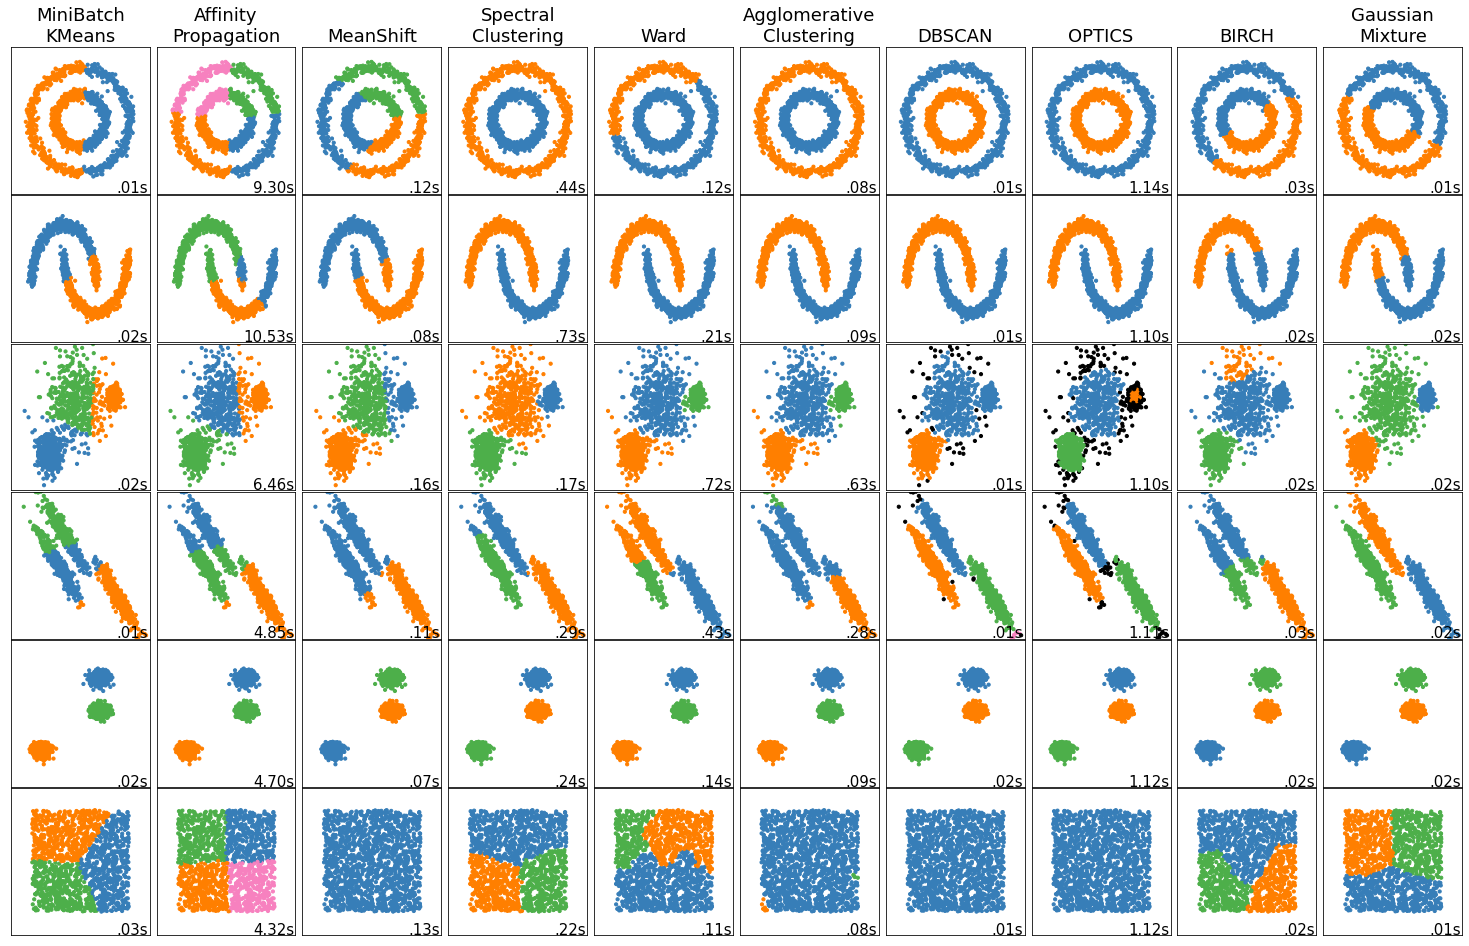

In [36]:
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatch\nKMeans', two_means),
        ('Affinity\nPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('Spectral\nClustering', spectral),
        ('Ward', ward),
        ('Agglomerative\nClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('BIRCH', birch),
        ('Gaussian\nMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()